# Principal Component Analysis

It is a powerful technique used in data analysis, particularly for reducing the dimensionality of datasets while preserving crucial information. It does this by transforming the original variables into a set of new, uncorrelated variables called **principal components**. It's key aspects:

- **Dimensionality reduction**: PCA helps manage high-dimensional datasets by extracting essential information and discarding less relevant features, simplifying analysis.
- **Data Exploration and Visualization**: It plays a significant role in data exploration and visualization, aiding uncovering hidden patterns and insights.
- **Linear Transformation**: PCA performs linear transformation of data, seeking directions of maximum variance.
- **Feature Selection**: Principal Components are ranked by the variance they explain, allowing effective feature selection.
- **Data Compression**: PCA can compress data while preserving most of the original information.
- **Clustering and Classification**: It finds applications in clustering and classification tasks by reducing noise and highlighting underlying structure.
- **Advantages**: PCA offers linearity, computational efficiency, and scalability for large datasets.
- **Limitations**: It assumes data normality and linearity and may lead to information loss.
- **Matrix Requirements**: PCA works with symmetric correlation or covariance matrices and requires numeric, standardized data.
- **Eigenvalues and Eigenvectors**: Eigenvalues represent variance magnitude, eignenvectors indicate variance direction.
- **Number of Components**: The number of principal components chosen determines the number of eigenvectors computed.

![illustration](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/01/image-1.png)


### How PCA Works?
1. **Standardize the Data:** If the features of your dataset are on different scales, it's essential to standardize them
2. **Compute the Covariance matrix:** Calculate the covariance matrix for the standardized dataset.
3. **Compute Eigenvectors and Eigenvalues:** Find the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the direction of maximum variance, and the corresponding eigenvalues indicate the magnitude of variance along those directions.
4. **Sort Eigenvectors by Eigenvalues:** Sort the eigenvectors based on their corresponding eigenvalues in descending order.
5. **Chose Principal Components:** Select the top $k$ eigenvectors (principal components) where $k$ is the desired dimensionality of the reduced data.
6. **Transform the Data:** Multiply the original standardized dataset by the selected principal components to obtain the new lower-dimensional representation of data.

In [6]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

(-3.863983239446097, 4.234154625821966, -3.022935878792453, 2.976314246710253)

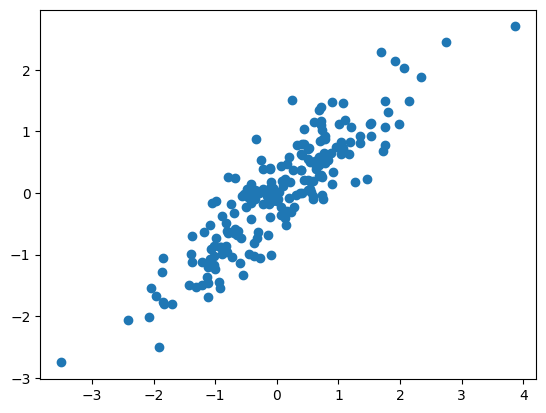

In [7]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [8]:
pca = PCA(n_components=2)
pca.fit(X)

print('Principal Components:', pca.components_)
print('Explained Variance:', pca.explained_variance_)

Principal Components: [[ 0.74306799  0.66921593]
 [-0.66921593  0.74306799]]
Explained Variance: [1.82927343 0.10246373]


(-3.863983239446097, 4.234154625821966, -3.022935878792453, 2.976314246710253)

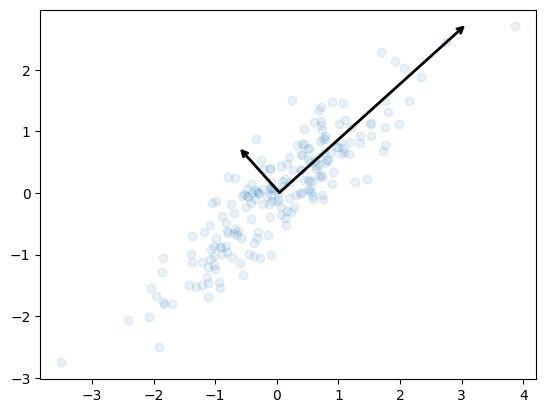

In [9]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

In [10]:
# PCA as dimensionality reduction

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

print('Original shape:', X.shape, '\nNew shape:', X_pca.shape)

Original shape: (200, 2) 
New shape: (200, 1)


(-3.863983239446097, 4.234154625821966, -3.292103760105897, 3.421644946888159)

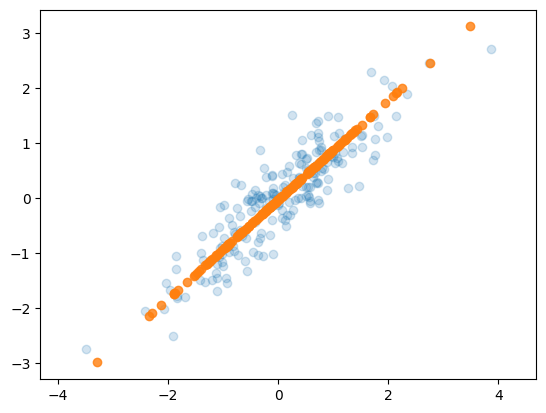

In [12]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, label='original')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, label='inverse')
plt.axis('equal')

Information is lost in the above example